# Hyperparameter Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

Create data based on $\sqrt{x}$

In [2]:
np.random.seed(13)

In [3]:
X = np.arange(1, 60, 5)
y = [np.sqrt(xi) + np.random.normal(0, 0.5) for xi in X]

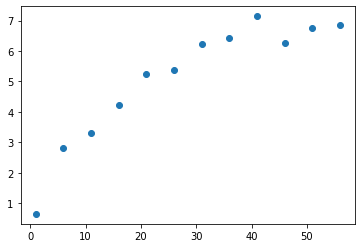

In [4]:
plt.scatter(X,y)

In [5]:
print(X.shape)
X = X.reshape(-1, 1)
print(X.shape)

(12,)
(12, 1)


### Pipeline advantages
* Aggregate functions
* Streamline functions
* Avoid repetition
* Grid search on transformers and estimators at once

In [6]:
my_pipe = Pipeline([
    ['my_poly_engineering', PolynomialFeatures(degree=2)],
    ['my_lasso', Lasso(max_iter=5000)]
])

In [7]:
my_pipe.fit(X, y)

Pipeline(steps=[('my_poly_engineering', PolynomialFeatures()),
                ['my_lasso', Lasso(max_iter=5000)]])

Find which hyperparameters are available in the pipeline

In [8]:
my_pipe.get_params()

{'memory': None,
 'steps': [('my_poly_engineering', PolynomialFeatures()),
  ['my_lasso', Lasso(max_iter=5000)]],
 'verbose': False,
 'my_poly_engineering': PolynomialFeatures(),
 'my_lasso': Lasso(max_iter=5000),
 'my_poly_engineering__degree': 2,
 'my_poly_engineering__include_bias': True,
 'my_poly_engineering__interaction_only': False,
 'my_poly_engineering__order': 'C',
 'my_lasso__alpha': 1.0,
 'my_lasso__copy_X': True,
 'my_lasso__fit_intercept': True,
 'my_lasso__max_iter': 5000,
 'my_lasso__normalize': 'deprecated',
 'my_lasso__positive': False,
 'my_lasso__precompute': False,
 'my_lasso__random_state': None,
 'my_lasso__selection': 'cyclic',
 'my_lasso__tol': 0.0001,
 'my_lasso__warm_start': False}

Create a parameter grid.    
GridSearchCV will test all possible combinations

In [9]:
parameter_grid = {
    'my_poly_engineering__degree': [1,2,3,4,5],
    'my_lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

Verbosity controls the amount of feedback (log) you get from a function

In [16]:
gridsearch = GridSearchCV(my_pipe, 
                          parameter_grid, 
                          scoring=None,
                          verbose=3)

In [17]:
gridsearch.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-2.761 total time=   0.0s
[CV 2/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-1.882 total time=   0.0s
[CV 3/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-91.027 total time=   0.0s
[CV 4/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-1.518 total time=   0.0s
[CV 5/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-1059.467 total time=   0.0s
[CV 1/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=0.795 total time=   0.0s
[CV 2/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=0.806 total time=   0.0s
[CV 3/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=0.103 total time=   0.0s
[CV 4/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=-0.355 total time=   0.0s
[CV 5/5] END my_lasso__alpha=0.001, m

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.213e-01, tolerance: 6.977e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e-01, tolerance: 4.263e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e-03, tolerance: 3.703e-03

GridSearchCV(estimator=Pipeline(steps=[('my_poly_engineering',
                                        PolynomialFeatures()),
                                       ['my_lasso', Lasso(max_iter=5000)]]),
             param_grid={'my_lasso__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'my_poly_engineering__degree': [1, 2, 3, 4, 5]},
             verbose=3)

Get best hyperparameters

In [18]:
gridsearch.best_params_

{'my_lasso__alpha': 1, 'my_poly_engineering__degree': 4}

Get best score from the estimator

In [19]:
gridsearch.best_estimator_.score(X,y)

0.9457966389120683

Use best hyperparameters to get a prediction

In [20]:
y_pred = gridsearch.best_estimator_.predict(X)

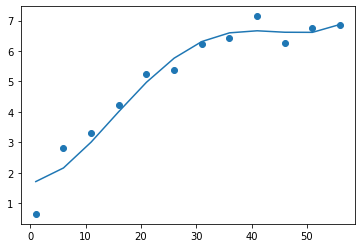

In [21]:
plt.scatter(X,y)
plt.plot(X,y_pred)

Get DataFrame of the different runs, the hyperparameters, and the score

In [22]:
import pandas as pd
pd.DataFrame(gridsearch.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_my_lasso__alpha,param_my_poly_engineering__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001064,0.000200,0.000481,0.000205,0.001,1,"{'my_lasso__alpha': 0.001, 'my_poly_engineerin...",-2.760832,-1.881563,-91.027203,-1.517913,-1059.466937,-231.330890,415.499629,15
1,0.000481,0.000021,0.000213,0.000005,0.001,2,"{'my_lasso__alpha': 0.001, 'my_poly_engineerin...",0.794717,0.806458,0.103246,-0.354808,-177.105602,-35.151198,70.978559,9
2,0.001529,0.000408,0.000312,0.000133,0.001,3,"{'my_lasso__alpha': 0.001, 'my_poly_engineerin...",0.818609,0.439338,-0.633969,-0.349954,-155.181242,-30.981444,62.102103,5
3,0.001513,0.000054,0.000274,0.000050,0.001,4,"{'my_lasso__alpha': 0.001, 'my_poly_engineerin...",0.769186,0.401892,-0.662379,-0.340469,-1822.554862,-364.477327,729.038946,18
4,0.001750,0.000078,0.000244,0.000019,0.001,5,"{'my_lasso__alpha': 0.001, 'my_poly_engineerin...",0.858319,0.397540,-0.561089,-0.364750,-7773.274893,-1554.588975,3109.343002,25
